# LightGBM Model

## Importing libraries

In [ ]:
!pip install shap

In [ ]:
!pip install optuna

## Importing library

In [ ]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Importing the dataset

In [ ]:
my_ds = pd.read_csv('breast-cancer.csv')
x = my_ds.iloc[:, 2:]
y = my_ds.iloc[:, 1].values

## Droping cols with tiny impact on dependent variable

In [ ]:
x = x.drop(['smoothness_se','texture_se', 'symmetry_se', 'fractal_dimension_mean', 'fractal_dimension_se'], axis=1)

In [ ]:
feature_names = list(x.columns)

In [ ]:
x = x.values

## Encoding Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Optuna Objective function

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def objective(trial):
    # Sample hyperparameters from the defined ranges
    num_iterations = trial.suggest_int('num_iterations', 50, 151, step=1)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, step=0.01)
    subsample = trial.suggest_float('subsample', 0.05, 1, step=0.05)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.05)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 10, 50, step=1)
    max_depth = trial.suggest_int('max_depth', 1, 100, step=1)
    num_leaves = trial.suggest_int('num_leaves', 2, 256, step=1)

    # Prepare the data (Replace X_train, X_test, y_train, y_test with your data)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Define the model with the sampled hyperparameters
    model = lgb.LGBMClassifier(
        objective='binary',
        metric='auc',
        boosting='gbdt',
        num_iterations=num_iterations,
        learning_rate=learning_rate,
        subsample=subsample,
        bagging_freq=1,
        colsample_bytree=colsample_bytree,
        min_data_in_leaf=min_data_in_leaf,
        max_depth=max_depth,
        num_leaves=num_leaves,
        random_state=0
    )

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC score as the objective to optimize
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Return the objective value (ROC-AUC score) to Optuna for optimization
    return roc_auc


## optuna optimization

In [ ]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the study (interrupt it if needed)
study.optimize(objective, n_trials=100)

[I 2023-08-08 12:28:45,904] A new study created in memory with name: no-name-110e2121-159a-4e3d-b57b-8788f8caa39b
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:45,971] Trial 0 finished with value: 0.5 and parameters: {'num_iterations': 148, 'learning_rate': 0.19, 'subsample': 0.05, 'colsample_bytree': 0.65, 'min_data_in_leaf': 40, 'max_depth': 74, 'num_leaves': 155}. Best is trial 0 with value: 0.5.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:45,991] Trial 1 finished with value: 0.928866306764052 and parameters: {'num_iterations': 56, 'learning_rate': 0.05, 'subsample': 0.05, 'colsample_bytree': 0.8, 'min_data_in_leaf': 16, 'max_depth': 9, 'num_leaves': 216}. Best is trial 1 with value: 0.928866306764052.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,034] Trial 2 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 92, 'learning_rate': 0.13,

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:46,142] Trial 4 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 132, 'learning_rate': 0.09, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 20, 'max_depth': 63, 'num_leaves': 97}. Best is trial 4 with value: 0.9996824388694824.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,158] Trial 5 finished with value: 0.9942838996506826 and parameters: {'num_iterations': 83, 'learning_rate': 0.08, 'subsample': 0.25, 'colsample_bytree': 0.5, 'min_data_in_leaf': 46, 'max_depth': 30, 'num_leaves': 78}. Best is trial 4 with value: 0.9996824388694824.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,226] Trial 6 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 97, 'learning_rate': 0.16, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 18, 'max_depth': 63, 'num_leaves': 211}. Best is trial 4

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:46,394] Trial 10 finished with value: 0.9958717053032708 and parameters: {'num_iterations': 134, 'learning_rate': 0.01, 'subsample': 0.9500000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 26, 'max_depth': 34, 'num_leaves': 8}. Best is trial 4 with value: 0.9996824388694824.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,543] Trial 11 finished with value: 0.9987297554779295 and parameters: {'num_iterations': 125, 'learning_rate': 0.15000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 10, 'max_depth': 84, 'num_leaves': 106}. Best is trial 4 with value: 0.9996824388694824.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


[I 2023-08-08 12:28:46,645] Trial 12 finished with value: 0.999047316608447 and parameters: {'num_iterations': 115, 'learning_rate': 0.15000000000000002, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 21, 'max_depth': 45, 'num_leaves': 254}. Best is trial 4 with value: 0.9996824388694824.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,770] Trial 13 finished with value: 1.0 and parameters: {'num_iterations': 151, 'learning_rate': 0.060000000000000005, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 22, 'max_depth': 48, 'num_leaves': 171}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,879] Trial 14 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 151, 'learning_rate': 0.060000000000000005, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 23, 'max_depth': 43, 'num_leaves':

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:46,991] Trial 15 finished with value: 0.9980946332168942 and parameters: {'num_iterations': 137, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_data_in_leaf': 30, 'max_depth': 50, 'num_leaves': 123}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,119] Trial 16 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 138, 'learning_rate': 0.11, 'subsample': 0.55, 'colsample_bytree': 0.9, 'min_data_in_leaf': 12, 'max_depth': 87, 'num_leaves': 53}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,210] Trial 17 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 121, 'learning_rate': 0.06999999999999999, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 34, 'max_depth': 33, 'num_leaves': 180}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,289] Trial 18 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 130, 'learning_rate': 0.09999999999999999, 'subsample': 0.4, 'colsample_bytree': 0.95, 'min_data_in_leaf': 23, 'max_depth': 70, 'num_leaves': 125}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,340] Trial 19 finished with value: 0.9952365830422356 and parameters: {'num_iterations': 145, 'learning_rate': 0.03, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.5, 'min_data_in_leaf

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_da

Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,470] Trial 20 finished with value: 0.9980946332168942 and parameters: {'num_iterations': 109, 'learning_rate': 0.03, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 20, 'max_depth': 56, 'num_leaves': 138}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17


[I 2023-08-08 12:28:47,647] Trial 21 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 76, 'learning_rate': 0.13, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 17, 'max_depth': 68, 'num_leaves': 246}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,737] Trial 22 finished with value: 1.0 and parameters: {'num_iterations': 103, 'learning_rate': 0.17, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 25, 'max_depth': 63, 'num_leaves': 191}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,808] Trial 23 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 61, 'learning_rate': 0.13, 'subsample': 0.7500000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 25, 'max_depth': 42, 'num_leaves': 184}. Best is trial 13 with va

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:47,892] Trial 24 finished with value: 1.0 and parameters: {'num_iterations': 141, 'learning_rate': 0.2, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 31, 'max_depth': 80, 'num_leaves': 192}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:47,977] Trial 25 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 142, 'learning_rate': 0.19, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 31, 'max_depth': 82, 'num_leaves': 193}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,046] Trial 26 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 151, 'learning_rate': 0.2, 'subsample': 0.45, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 33, 'max_depth': 96, 'num_leaves': 227}. Best is trial 13 with value: 1.0.
Fou

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:48,137] Trial 27 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 122, 'learning_rate': 0.17, 'subsample': 0.7000000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 27, 'max_depth': 91, 'num_leaves': 166}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,224] Trial 28 finished with value: 0.9987297554779295 and parameters: {'num_iterations': 106, 'learning_rate': 0.2, 'subsample': 1.0, 'colsample_bytree': 0.95, 'min_data_in_leaf': 37, 'max_depth': 77, 'num_leaves': 230}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,307] Trial 29 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 146, 'learning_rate': 0.18000000000000002, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.6, 'min_data_in_leaf': 40, 'max_depth': 51, 'num_leaves': 166}. Best is trial 13 with v

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_da

Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,437] Trial 31 finished with value: 0.9984121943474119 and parameters: {'num_iterations': 67, 'learning_rate': 0.17, 'subsample': 0.8, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 43, 'max_depth': 79, 'num_leaves': 148}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,494] Trial 32 finished with value: 0.997459510955859 and parameters: {'num_iterations': 51, 'learning_rate': 0.19, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 50, 'max_depth': 67, 'num_leaves': 177}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,554] Trial 33 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 67, 'learning_rate': 0.15000000000000002, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.75, 'min_data_in_leaf': 4

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:48,641] Trial 34 finished with value: 0.9977770720863766 and parameters: {'num_iterations': 91, 'learning_rate': 0.17, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 29, 'max_depth': 74, 'num_leaves': 155}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,726] Trial 35 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 82, 'learning_rate': 0.2, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 24, 'max_depth': 55, 'num_leaves': 136}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,775] Trial 36 finished with value: 0.5 and parameters: {'num_iterations': 104, 'learning_rate': 0.14, 'subsample': 0.05, 'colsample_bytree': 0.75, 'min_data_in_leaf': 37, 'max_depth': 65, 'num_leaves': 187}. Best is trial 13 with value: 1.0.
Foun

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_da

Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:48,997] Trial 38 finished with value: 0.999047316608447 and parameters: {'num_iterations': 117, 'learning_rate': 0.12, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 14, 'max_depth': 92, 'num_leaves': 113}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:49,094] Trial 39 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 97, 'learning_rate': 0.08, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 21, 'max_depth': 62, 'num_leaves': 235}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:49,167] Trial 40 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 141, 'learning_rate': 0.16, 'subsample': 0.5, 'colsample_bytree': 0.55, 'min_data_in_leaf': 44, 'max_depth': 72, 'num_leaves': 153}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:49,263] Trial 41 finished with value: 1.0 and parameters: {'num_iterations': 129, 'learning_rate': 0.18000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 33, 'max_depth': 17, 'num_leaves': 209}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_da

[I 2023-08-08 12:28:49,369] Trial 42 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 136, 'learning_rate': 0.18000000000000002, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 31, 'max_depth': 22, 'num_leaves': 204}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:49,504] Trial 43 finished with value: 0.999047316608447 and parameters: {'num_iterations': 127, 'learning_rate': 0.16, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.7, 'min_data_in_leaf': 28, 'max_depth': 15, 'num_leaves': 215}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38


[I 2023-08-08 12:28:49,641] Trial 44 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 143, 'learning_rate': 0.19, 'subsample': 0.8, 'colsample_bytree': 1.0, 'min_data_in_leaf': 38, 'max_depth': 28, 'num_leaves': 175}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:49,776] Trial 45 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 148, 'learning_rate': 0.17, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 34, 'max_depth': 8, 'num_leaves': 194}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26


[I 2023-08-08 12:28:49,908] Trial 46 finished with value: 0.999047316608447 and parameters: {'num_iterations': 85, 'learning_rate': 0.14, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 26, 'max_depth': 80, 'num_leaves': 161}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:50,069] Trial 47 finished with value: 0.9987297554779294 and parameters: {'num_iterations': 133, 'learning_rate': 0.18000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 19, 'max_depth': 40, 'num_leaves': 80}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22


[I 2023-08-08 12:28:50,233] Trial 48 finished with value: 1.0 and parameters: {'num_iterations': 139, 'learning_rate': 0.19, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 22, 'max_depth': 85, 'num_leaves': 222}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:50,340] Trial 49 finished with value: 0.9984121943474118 and parameters: {'num_iterations': 98, 'learning_rate': 0.04, 'subsample': 0.8, 'colsample_bytree': 0.95, 'min_data_in_leaf': 40, 'max_depth': 49, 'num_leaves': 142}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:50,440] Trial 50 finished with value: 1.0 and parameters: {'num_iterations': 117, 'learning_rate': 0.060000000000000005, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 47, 'max_depth': 26, 'num_leaves': 207}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:50,582] Trial 51 finished with value: 1.0 and parameters: {'num_iterations': 129, 'learning_rate': 0.18000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 35, 'max_depth': 14, 'num_leaves': 238}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31


[I 2023-08-08 12:28:50,821] Trial 52 finished with value: 0.9984121943474118 and parameters: {'num_iterations': 121, 'learning_rate': 0.16, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_data_in_leaf': 31, 'max_depth': 9, 'num_leaves': 214}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:51,141] Trial 53 finished with value: 1.0 and parameters: {'num_iterations': 133, 'learning_rate': 0.19, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 33, 'max_depth': 23, 'num_leaves': 186}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:51,392] Trial 54 finished with value: 0.997459510955859 and parameters: {'num_iterations': 112, 'learning_rate': 0.2, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 29, 'max_depth': 2, 'num_leaves': 202}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


[I 2023-08-08 12:28:51,686] Trial 55 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 126, 'learning_rate': 0.15000000000000002, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 25, 'max_depth': 32, 'num_leaves': 176}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27


[I 2023-08-08 12:28:52,038] Trial 56 finished with value: 0.9987297554779295 and parameters: {'num_iterations': 147, 'learning_rate': 0.09, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 27, 'max_depth': 38, 'num_leaves': 191}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:52,222] Trial 57 finished with value: 1.0 and parameters: {'num_iterations': 151, 'learning_rate': 0.17, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 33, 'max_depth': 17, 'num_leaves': 250}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39


[I 2023-08-08 12:28:52,374] Trial 58 finished with value: 0.9987297554779295 and parameters: {'num_iterations': 74, 'learning_rate': 0.14, 'subsample': 0.8500000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 39, 'max_depth': 59, 'num_leaves': 210}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:52,529] Trial 59 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 124, 'learning_rate': 0.16, 'subsample': 0.55, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 36, 'max_depth': 76, 'num_leaves': 170}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:52,649] Trial 60 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 138, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 42, 'max_depth': 47, 'num_leaves': 3}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:52,848] Trial 61 finished with value: 1.0 and parameters: {'num_iterations': 140, 'learning_rate': 0.19, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 22, 'max_depth': 98, 'num_leaves': 219}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:53,111] Trial 62 finished with value: 1.0 and parameters: {'num_iterations': 143, 'learning_rate': 0.18000000000000002, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 19, 'max_depth': 86, 'num_leaves': 227}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


[I 2023-08-08 12:28:53,294] Trial 63 finished with value: 1.0 and parameters: {'num_iterations': 132, 'learning_rate': 0.18000000000000002, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 23, 'max_depth': 83, 'num_leaves': 222}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:53,534] Trial 64 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 129, 'learning_rate': 0.19, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 15, 'max_depth': 93, 'num_leaves': 244}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:53,775] Trial 65 finished with value: 0.9987297554779294 and parameters: {'num_iterations': 137, 'learning_rate': 0.09999999999999999, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 21, 'max_depth': 69, 'num_leaves': 200}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:54,003] Trial 66 finished with value: 0.9961892664337885 and parameters: {'num_iterations': 145, 'learning_rate': 0.01, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 25, 'max_depth': 36, 'num_leaves': 161}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


[I 2023-08-08 12:28:54,207] Trial 67 finished with value: 1.0 and parameters: {'num_iterations': 102, 'learning_rate': 0.17, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 30, 'max_depth': 87, 'num_leaves': 56}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:54,386] Trial 68 finished with value: 0.999047316608447 and parameters: {'num_iterations': 94, 'learning_rate': 0.2, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 32, 'max_depth': 77, 'num_leaves': 183}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


[I 2023-08-08 12:28:54,521] Trial 69 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 135, 'learning_rate': 0.19, 'subsample': 0.7500000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 50, 'max_depth': 54, 'num_leaves': 119}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:54,677] Trial 70 finished with value: 0.9987297554779295 and parameters: {'num_iterations': 88, 'learning_rate': 0.15000000000000002, 'subsample': 0.35000000000000003, 'colsample_bytree': 0.95, 'min_data_in_leaf': 17, 'max_depth': 81, 'num_leaves': 210}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46


[I 2023-08-08 12:28:54,819] Trial 71 finished with value: 0.999047316608447 and parameters: {'num_iterations': 109, 'learning_rate': 0.060000000000000005, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 46, 'max_depth': 22, 'num_leaves': 208}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:54,986] Trial 72 finished with value: 0.9980946332168942 and parameters: {'num_iterations': 116, 'learning_rate': 0.03, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 24, 'max_depth': 25, 'num_leaves': 225}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:55,076] Trial 73 finished with value: 0.9907907272149888 and parameters: {'num_iterations': 121, 'learning_rate': 0.060000000000000005, 'subsample': 0.2, 'colsample_bytree': 0.9, 'min_data_in_leaf': 47, 'max_depth': 28, 'num_leaves': 193}. Best is

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:55,261] Trial 74 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 140, 'learning_rate': 0.08, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 44, 'max_depth': 12, 'num_leaves': 233}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48


[I 2023-08-08 12:28:55,437] Trial 75 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 113, 'learning_rate': 0.06999999999999999, 'subsample': 0.55, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 48, 'max_depth': 73, 'num_leaves': 198}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:55,605] Trial 76 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 119, 'learning_rate': 0.05, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 28, 'max_depth': 20, 'num_leaves': 205}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48


[I 2023-08-08 12:28:55,771] Trial 77 finished with value: 0.9980946332168942 and parameters: {'num_iterations': 106, 'learning_rate': 0.04, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 48, 'max_depth': 65, 'num_leaves': 174}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:55,959] Trial 78 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 149, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 0.7, 'min_data_in_leaf': 22, 'max_depth': 18, 'num_leaves': 239}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41


[I 2023-08-08 12:28:56,113] Trial 79 finished with value: 0.9993648777389648 and parameters: {'num_iterations': 130, 'learning_rate': 0.12, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 41, 'max_depth': 4, 'num_leaves': 217}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:56,232] Trial 80 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 125, 'learning_rate': 0.18000000000000002, 'subsample': 0.5, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 45, 'max_depth': 85, 'num_leaves': 147}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34


[I 2023-08-08 12:28:56,422] Trial 81 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 129, 'learning_rate': 0.18000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 34, 'max_depth': 15, 'num_leaves': 256}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:56,574] Trial 82 finished with value: 0.9984121943474118 and parameters: {'num_iterations': 59, 'learning_rate': 0.06999999999999999, 'subsample': 1.0, 'colsample_bytree': 0.9, 'min_data_in_leaf': 35, 'max_depth': 7, 'num_leaves': 241}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32


[I 2023-08-08 12:28:56,766] Trial 83 finished with value: 0.9987297554779294 and parameters: {'num_iterations': 123, 'learning_rate': 0.17, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 32, 'max_depth': 13, 'num_leaves': 189}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:56,975] Trial 84 finished with value: 0.9980946332168943 and parameters: {'num_iterations': 119, 'learning_rate': 0.19, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 36, 'max_depth': 25, 'num_leaves': 231}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29


[I 2023-08-08 12:28:57,180] Trial 85 finished with value: 1.0 and parameters: {'num_iterations': 131, 'learning_rate': 0.18000000000000002, 'subsample': 0.8, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 29, 'max_depth': 12, 'num_leaves': 132}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:57,423] Trial 86 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 127, 'learning_rate': 0.16, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 27, 'max_depth': 90, 'num_leaves': 180}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:57,596] Trial 87 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 135, 'learning_rate': 0.17, 'subsample': 0.8500000000000001, 'colsample_bytree': 1.0, 'min_data_in_leaf': 38, 'max_depth': 61, 'num_leaves': 161}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


[I 2023-08-08 12:28:57,785] Trial 88 finished with value: 0.9990473166084471 and parameters: {'num_iterations': 144, 'learning_rate': 0.19, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 30, 'max_depth': 95, 'num_leaves': 196}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:57,997] Trial 89 finished with value: 1.0 and parameters: {'num_iterations': 80, 'learning_rate': 0.2, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 35, 'max_depth': 19, 'num_leaves': 237}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:58,306] Trial 90 finished with value: 1.0 and parameters: {'num_iterations': 139, 'learning_rate': 0.18000000000000002, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.95, 'min_data_in_leaf': 32, 'max_depth': 10, 'num_leaves': 221}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:58,538] Trial 91 finished with value: 1.0 and parameters: {'num_iterations': 134, 'learning_rate': 0.19, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 33, 'max_depth': 24, 'num_leaves': 185}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:58,725] Trial 92 finished with value: 1.0 and parameters: {'num_iterations': 128, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 31, 'max_depth': 29, 'num_leaves': 206}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


[I 2023-08-08 12:28:58,949] Trial 93 finished with value: 0.9984121943474119 and parameters: {'num_iterations': 133, 'learning_rate': 0.18000000000000002, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 20, 'max_depth': 16, 'num_leaves': 214}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:59,136] Trial 94 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 141, 'learning_rate': 0.17, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 35, 'max_depth': 21, 'num_leaves': 200}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:59,294] Trial 95 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 70, 'learning_rate': 0.19, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8, 'min_data_in_leaf': 33, 'max_depth': 32, 'num_leaves': 170}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24


[I 2023-08-08 12:28:59,544] Trial 96 finished with value: 1.0 and parameters: {'num_iterations': 149, 'learning_rate': 0.16, 'subsample': 0.8, 'colsample_bytree': 0.75, 'min_data_in_leaf': 24, 'max_depth': 44, 'num_leaves': 17}. Best is trial 13 with value: 1.0.
Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:28:59,683] Trial 97 finished with value: 0.9977770720863767 and parameters: {'num_iterations': 131, 'learning_rate': 0.04, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.9, 'min_data_in_leaf': 49, 'max_depth': 27, 'num_leaves': 188}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:29:00,001] Trial 98 finished with value: 0.9996824388694824 and parameters: {'num_iterations': 136, 'learning_rate': 0.060000000000000005, 'subsample': 0.7500000000000001, 'colsample_bytree': 0.65, 'min_data_in_leaf': 26, 'max_depth': 71, 'num_leaves': 151}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26


Found `num_iterations` in params. Will use it instead of argument
[I 2023-08-08 12:29:00,373] Trial 99 finished with value: 0.9987297554779294 and parameters: {'num_iterations': 118, 'learning_rate': 0.02, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.8500000000000001, 'min_data_in_leaf': 22, 'max_depth': 83, 'num_leaves': 182}. Best is trial 13 with value: 1.0.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22


## Optuna results

In [ ]:
# Access the best hyperparameters found so far
best_params = study.best_params
best_score = study.best_value

# Access the trials dataframe to see the results of all trials
trials_dataframe = study.trials_dataframe()

print("Best Parameters:", best_params)
print("Best Score (ROC-AUC):", best_score)

# Print the dataframe with the results of all trials
print(trials_dataframe)

Best Parameters: {'num_iterations': 151, 'learning_rate': 0.060000000000000005, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_data_in_leaf': 22, 'max_depth': 48, 'num_leaves': 171}
Best Score (ROC-AUC): 1.0
    number     value             datetime_start          datetime_complete  \
0        0  0.500000 2023-08-08 12:28:45.910031 2023-08-08 12:28:45.971105   
1        1  0.928866 2023-08-08 12:28:45.973398 2023-08-08 12:28:45.990933   
2        2  0.999365 2023-08-08 12:28:45.992917 2023-08-08 12:28:46.033770   
3        3  0.999047 2023-08-08 12:28:46.035026 2023-08-08 12:28:46.054190   
4        4  0.999682 2023-08-08 12:28:46.055676 2023-08-08 12:28:46.142063   
..     ...       ...                        ...                        ...   
95      95  0.999682 2023-08-08 12:28:59.139141 2023-08-08 12:28:59.293961   
96      96  1.000000 2023-08-08 12:28:59.300803 2023-08-08 12:28:59.544162   
97      97  0.997777 2023-08-08 12:28:59.545858 2023-08-08 12:28:59.682942   
98      98 

## Splitting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Re-training model with optimal parameters

In [ ]:
lgbm_classifier = lgb.LGBMClassifier(**best_params)
lgbm_classifier.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22


Found `num_iterations` in params. Will use it instead of argument


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.060000000000000005,
               max_depth=48, min_data_in_leaf=22, num_iterations=151,
               num_leaves=171, subsample=0.8)

# SHAP

## Expainer

In [ ]:
# Fits the explainer
explainer = shap.Explainer(lgbm_classifier, feature_names=feature_names)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x)

## Waterfall plot

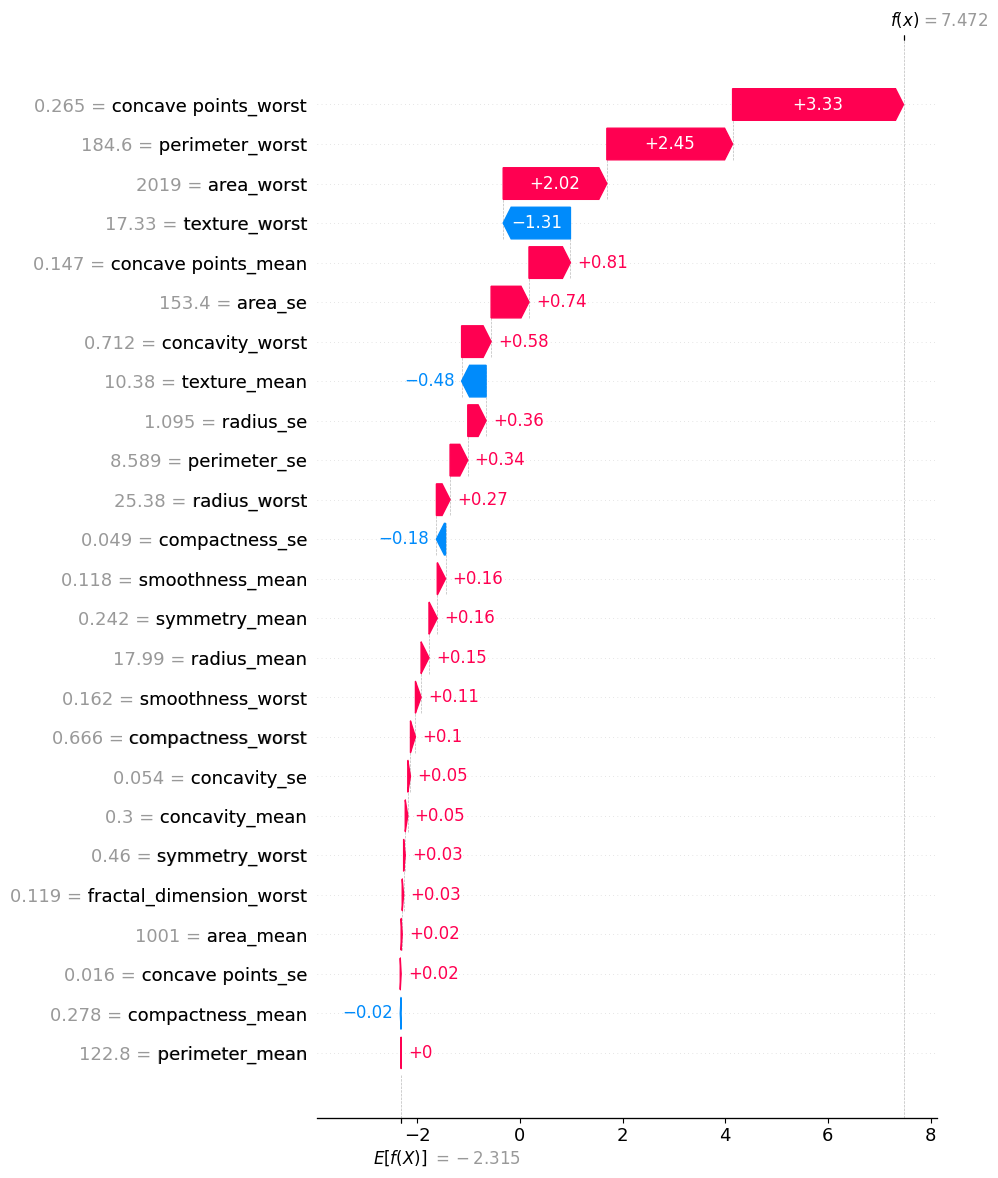

In [ ]:
shap.plots.waterfall(shap_values[0][:, 1], max_display=25)

## Force Plot

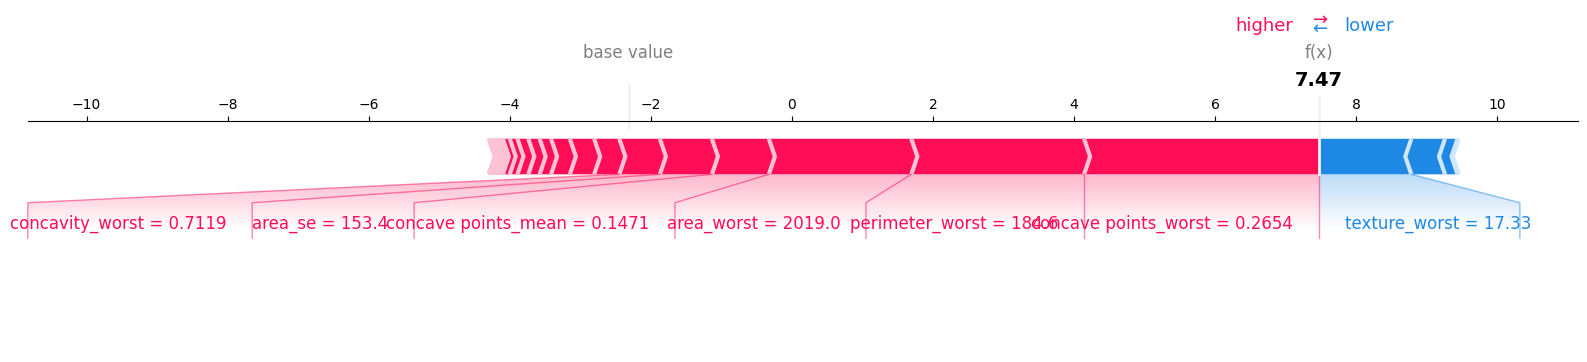

In [ ]:
shap.plots.force(shap_values[0][:, 1], matplotlib=True)

## Stacked force plot

In [ ]:
shap.initjs()
shap.plots.force(shap_values[:, :, 1])

## Bar plot

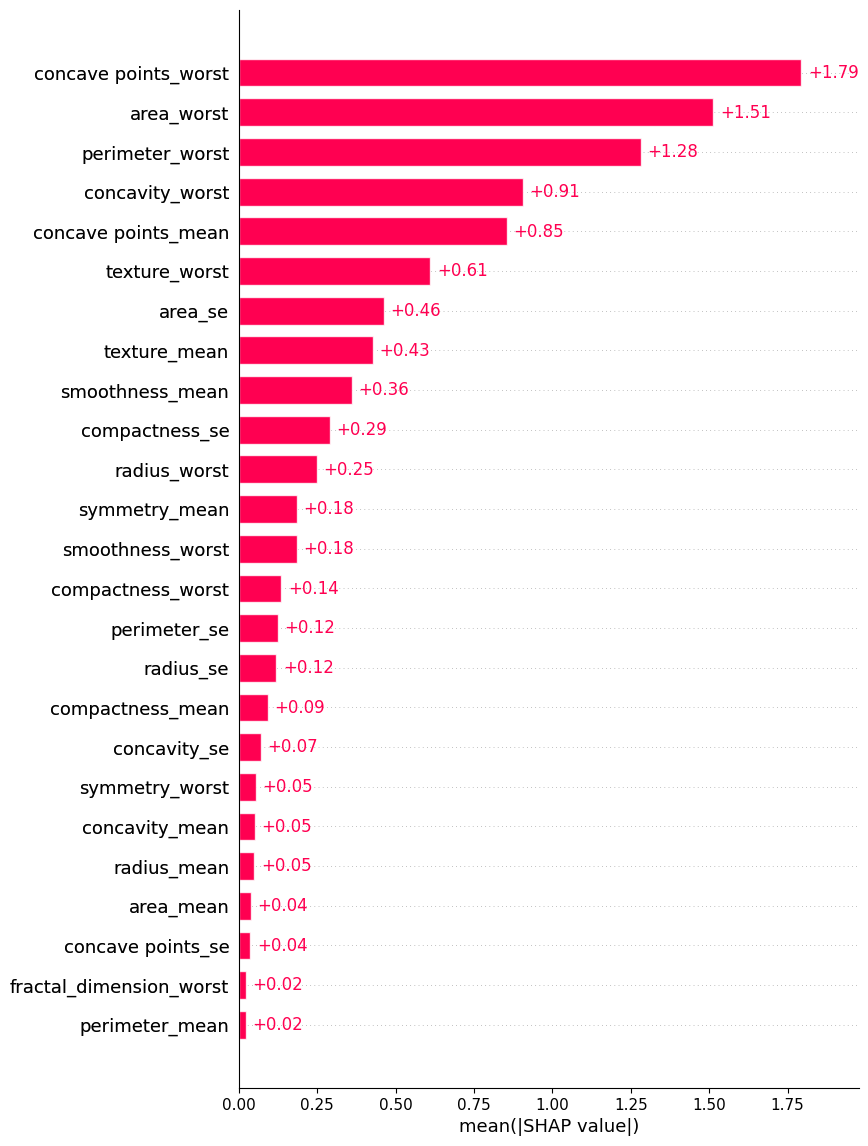

In [ ]:
shap.plots.bar(shap_values[:, :, 1], max_display=25)

## Beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


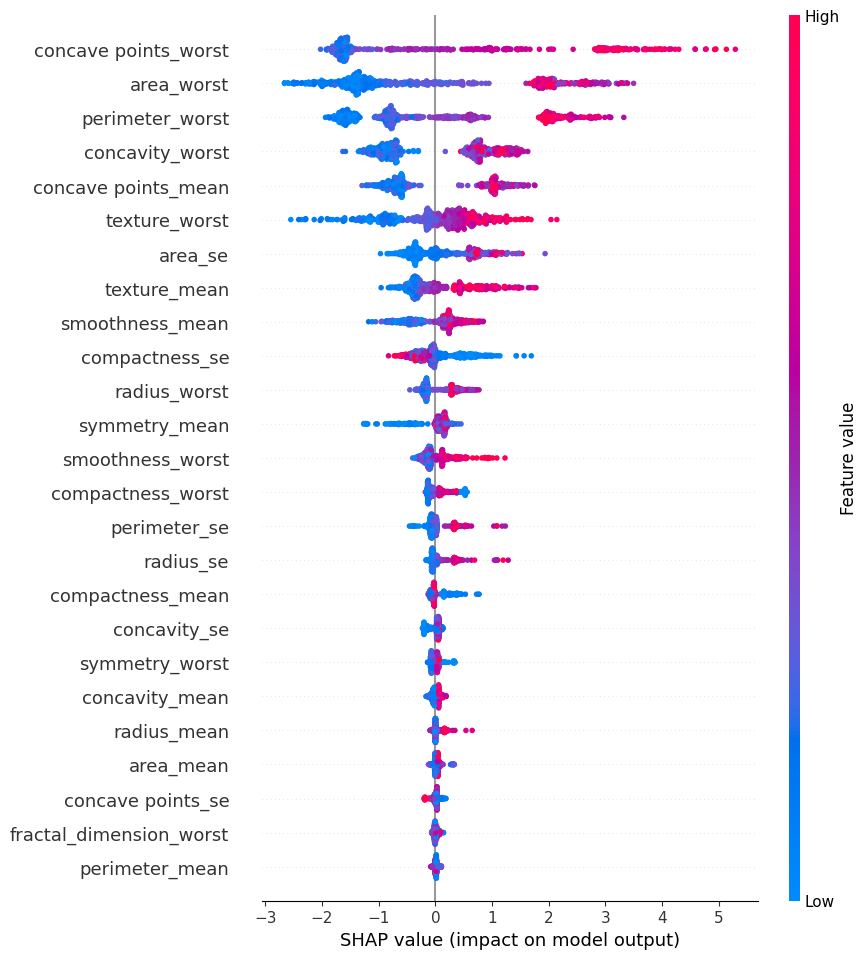

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=25)

# Applying k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lgbm_classifier, X=x_train, y=y_train, cv=10)

In [ ]:
print("Accuracy: {:.10f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.10f} %".format(accuracies.std()*100))

Accuracy: 97.3671497585 %
Standard Deviation: 2.3730823814 %


## Evaluate using confusion matrix & accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lgbm_classifier.predict(x_test)

my_conf_matrix2 = confusion_matrix(y_test, y_pred)
print(my_conf_matrix2)
accuracy_score(y_test, y_pred)

[[66  1]
 [ 3 44]]


0.9649122807017544

### Confusion Martix with labels

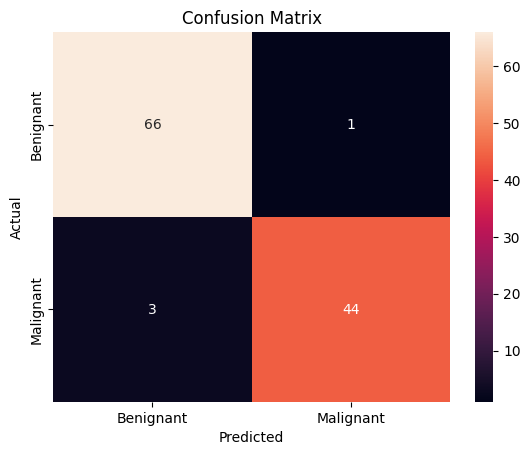

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(my_conf_matrix2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benignant', 'Malignant']); ax.yaxis.set_ticklabels(['Benignant', 'Malignant']);

### Evaluating using classification report

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Specificity & Sensitivity Score

In [ ]:
from imblearn.metrics import sensitivity_specificity_support

pd.DataFrame(sensitivity_specificity_support(y_test, y_pred, average=None), index=['Sensitivity', 'Specificity', 'Support']).T

,Sensitivity,Specificity,Support
0,0.985075,0.936170,67.0
1,0.936170,0.985075,47.0


## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lgbm_classifier.predict_proba(x_test)

In [ ]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.000078,0.999922
1,0.995369,0.004631
2,0.999803,0.000197
3,0.999339,0.000661
4,0.999425,0.000575
...,...,...
109,0.028412,0.971588
110,0.999745,0.000255
111,0.000072,0.999928
112,0.000121,0.999879


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


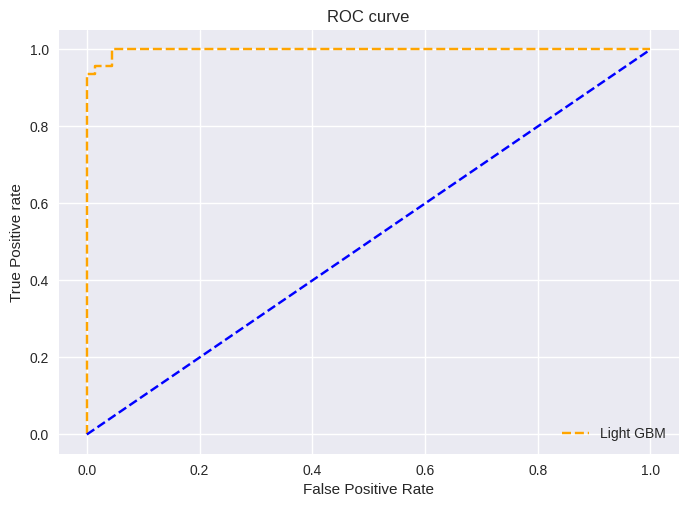

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Light GBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba[:,1]))

ROC AUC Score:  0.9977770720863766


## Precision Recall Curve (PRC)

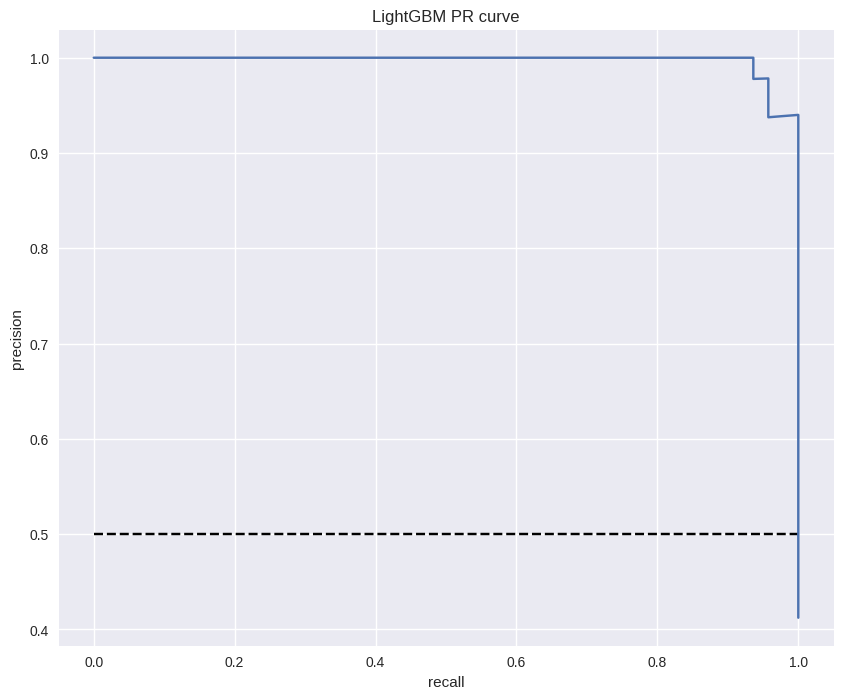

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('LightGBM PR curve')
plt.show()

In [ ]:
print("PRC AUC Score: ", auc(recall, precision))

PRC AUC Score:  0.99692648582714
